# RSI

- 상대강도지수
- 가격의 상승압력과 하락압력 간의 상대적인 강도를 나타냄
- 일정기간동안 주가가 전일가격에 비해 상승한 변화량과 하락한 변화량의 평균값을 구함
- 상승한 변화량이 크면 과매수
- 하락한 변화량이 크면 과매도

# 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import FinanceDataReader as fdr

In [25]:
# 팬오션 : 028670
df = fdr.DataReader("028670", "2021", "2022")

# 전일 대비 상승, 하락 변수

In [26]:
# 전일대비 차이
df["diff"] = df["Close"].diff()

In [27]:
def UD(diff):
    """
    diff값을 입력받아 0 이면 ups , downs를 0으로
    0보다 크면 ups 에 diff값
    0보다 작으면 downs에 절댓값을 취한 diff값을 반환
    """
    ups = 0
    downs = 0
    
    if diff > 0 :
        ups= diff
    elif diff < 0:
        downs= abs(diff)
    return pd.Series([ups,downs])

In [28]:
df[["U","D"]] = df["diff"].apply(UD)
df

,Open,High,Low,Close,Volume,Change,diff,U,D
Date,,,,,,,,,
2021-01-04,5150,5450,5050,5370,12120901,0.069721,NaN,0.0,0.0
2021-01-05,5300,5610,5150,5430,16012791,0.011173,60.0,60.0,0.0
2021-01-06,5480,5490,5070,5120,8510216,-0.057090,-310.0,0.0,310.0
2021-01-07,5200,5290,5000,5080,7363429,-0.007812,-40.0,0.0,40.0
2021-01-08,5120,5150,4920,4995,5112844,-0.016732,-85.0,0.0,85.0
...,...,...,...,...,...,...,...,...,...
2021-05-04,7150,7320,7010,7160,10313108,0.019943,140.0,140.0,0.0
2021-05-06,7280,7760,7240,7700,17992669,0.075419,540.0,540.0,0.0
2021-05-07,7810,7840,7320,7440,20286260,-0.033766,-260.0,0.0,260.0


# AU / AD 변수 생성

In [29]:
# AU = 일정기간(14일 설정)동안의 U의 평균값
# AD = 일정기간(14일 설정)동안의 D의 평균값

df["AU"] = df["U"].rolling(14).mean()
df["AD"] = df["D"].rolling(14).mean()

df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD
Date,,,,,,,,,,,
2021-05-04,7150,7320,7010,7160,10313108,0.019943,140.0,140.0,0.0,143.571429,65.714286
2021-05-06,7280,7760,7240,7700,17992669,0.075419,540.0,540.0,0.0,182.142857,58.571429
2021-05-07,7810,7840,7320,7440,20286260,-0.033766,-260.0,0.0,260.0,155.714286,77.142857
2021-05-10,7460,7520,7170,7390,10111009,-0.006720,-50.0,0.0,50.0,143.571429,80.714286
2021-05-11,7360,7510,7300,7450,6705914,0.008119,60.0,60.0,0.0,147.142857,80.714286


# RS / RSI 변수 생성

In [30]:
df["RS"] = df["AU"] / df["AD"]

In [31]:
df["RSI"] = df["RS"] / (1+df["RS"])

In [32]:
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI
Date,,,,,,,,,,,,,
2021-05-04,7150,7320,7010,7160,10313108,0.019943,140.0,140.0,0.0,143.571429,65.714286,2.184783,0.686007
2021-05-06,7280,7760,7240,7700,17992669,0.075419,540.0,540.0,0.0,182.142857,58.571429,3.109756,0.756677
2021-05-07,7810,7840,7320,7440,20286260,-0.033766,-260.0,0.0,260.0,155.714286,77.142857,2.018519,0.668712
2021-05-10,7460,7520,7170,7390,10111009,-0.006720,-50.0,0.0,50.0,143.571429,80.714286,1.778761,0.640127
2021-05-11,7360,7510,7300,7450,6705914,0.008119,60.0,60.0,0.0,147.142857,80.714286,1.823009,0.645768


# RSI signal

In [33]:
df["RSI_signal"] = df["RSI"].rolling(6).mean()
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI,RSI_signal
Date,,,,,,,,,,,,,,
2021-05-04,7150,7320,7010,7160,10313108,0.019943,140.0,140.0,0.0,143.571429,65.714286,2.184783,0.686007,0.720601
2021-05-06,7280,7760,7240,7700,17992669,0.075419,540.0,540.0,0.0,182.142857,58.571429,3.109756,0.756677,0.719183
2021-05-07,7810,7840,7320,7440,20286260,-0.033766,-260.0,0.0,260.0,155.714286,77.142857,2.018519,0.668712,0.707129
2021-05-10,7460,7520,7170,7390,10111009,-0.006720,-50.0,0.0,50.0,143.571429,80.714286,1.778761,0.640127,0.692248
2021-05-11,7360,7510,7300,7450,6705914,0.008119,60.0,60.0,0.0,147.142857,80.714286,1.823009,0.645768,0.675189


# RSI 해석

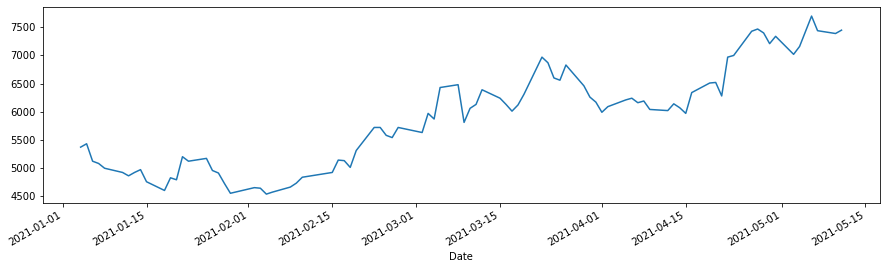

In [36]:
# 시각화
df["Close"].plot(figsize=(15,4))

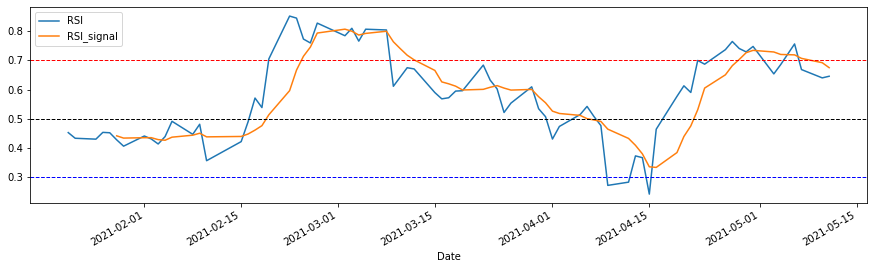

In [38]:
df[["RSI", "RSI_signal"]].plot(figsize=(15,4))
plt.axhline(0.5, c="k", lw=1, ls="--")
plt.axhline(0.7, c="r", lw=1, ls="--")
plt.axhline(0.3, c="b", lw=1, ls="--")

- RSI가 50% 이상은 매수세 우세, 50% 이하는 매도세 우세
- RSI 70% 이상 초과매수 국면 돌입
- RSI 30% 이하 초과매도 국면
- RSI가 시그널선을 상향 돌파 시 단기적으로 매수세가 늘어나는 추세
- RSI가 시그널선을 하향 돌파 시 단기적으로 매도세가 늘어나는 추세

# plotly를 통한 시각화

## plotly.express

In [40]:
import plotly.express as px

In [42]:
# 30%, 70% line 만들기
df["s3"] = 0.3
df["s7"] = 0.7

In [43]:
px.line(df[["RSI","RSI_signal","s3","s7"]])

## graph_objs와 subplots을 사용한 시각화

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [50]:
fig = make_subplots(rows=3, cols=1, 
                    vertical_spacing= 0.01, 
                    shared_xaxes=True, 
                    subplot_titles=('<b>팬오션</b>',
                                    '<b>Select Data Range</b>',
                                    '<b>RSI & RSI signal</b>'))

fig.add_trace(go.Candlestick(x=df.index, 
                             open=df["Open"],  
                             high=df["High"], 
                             low=df["Low"], 
                             close=df["Close"], name="candle stick"), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df["RSI"],
                         line=dict(color="blue"),
                         name='RSI'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["RSI_signal"],
                         line=dict(color="red"),
                         name='RSI_signal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=np.ones(len(df))*0.3,
                         line=dict(color="blue",dash='dash'),
                         name='Low bound'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=np.ones(len(df))*0.7,
                         line=dict(color="red",dash='dash'),
                         name='High bound'), row=3, col=1)

fig.update_layout(width=800, height=800, xaxis_rangeslider_visible=True)